# Install required libraries


In [ ]:
# Install required libraries (if not already installed)
!pip install --upgrade yfinance pandas_datareader matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


# START

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
# For reading stock data from Yahoo Finance
import yfinance as yf

In [ ]:
# For handling timestamps
from datetime import datetime

In [ ]:
# The tech and automobile stocks we'll use for this analysis
tech_list = ["AAPL", "TSLA"]

# Data Processing Module

In [ ]:
# Set up End and Start times for maximum data
start = "1900-01-01"  # Fetches the maximum available historical data
end = datetime.now()  # Until today

In [ ]:
# Fetch data for each stock and store it in a dictionary
company_dict = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Assign company names to each DataFrame
company_name = ["AAPL", "TSLA"]

for (stock, df), name in zip(company_dict.items(), company_name):
    df["company_name"] = name  # Add company name column

In [ ]:
# Combine all data into a single DataFrame
df = pd.concat(company_dict.values(), axis=0)
df
# Display the last 10 rows
# df.tail(10)


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600.0,AAPL,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800.0,AAPL,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000.0,AAPL,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600.0,AAPL,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600.0,AAPL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,NaN,NaN,NaN,NaN,NaN,TSLA,272.059998,284.899994,266.510010,282.660004,153629800.0
2025-03-27,NaN,NaN,NaN,NaN,NaN,TSLA,273.130005,291.850006,271.820007,272.480011,162572100.0


# Getting data information

In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14879 entries, 1980-12-12 to 2025-04-01
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     11166 non-null  float64
 1   (High, AAPL)      11166 non-null  float64
 2   (Low, AAPL)       11166 non-null  float64
 3   (Open, AAPL)      11166 non-null  float64
 4   (Volume, AAPL)    11166 non-null  float64
 5   (company_name, )  14879 non-null  object 
 6   (Close, TSLA)     3713 non-null   float64
 7   (High, TSLA)      3713 non-null   float64
 8   (Low, TSLA)       3713 non-null   float64
 9   (Open, TSLA)      3713 non-null   float64
 10  (Volume, TSLA)    3713 non-null   float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,TSLA,TSLA,TSLA,TSLA,TSLA
count,11166.000000,11166.000000,11166.000000,11166.000000,1.116600e+04,3713.000000,3713.000000,3713.000000,3713.000000,3.713000e+03
mean,24.592899,24.837729,24.322907,24.573464,3.140489e+08,85.642782,87.576508,83.641004,85.687683,9.669146e+07
std,51.819422,52.319769,51.256557,51.767369,3.345299e+08,111.707808,114.344809,109.031796,111.836794,7.721039e+07
min,0.037773,0.038203,0.037773,0.038203,0.000000e+00,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,0.244305,0.249395,0.238900,0.244269,1.099329e+08,12.301333,12.568000,12.066667,12.282667,4.958700e+07
50%,0.453388,0.461165,0.447248,0.453374,2.024512e+08,18.492666,18.760000,18.220667,18.506666,8.243970e+07
75%,18.789073,18.983273,18.625799,18.803610,3.945074e+08,184.860001,188.500000,180.630005,184.990005,1.222880e+08
max,258.735504,259.814335,257.347047,257.906429,7.421641e+09,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [ ]:
df.columns

MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     ''),
            (       'Close', 'TSLA'),
            (        'High', 'TSLA'),
            (         'Low', 'TSLA'),
            (        'Open', 'TSLA'),
            (      'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [ ]:
# Fetch NVDA stock data
nvda_df = yf.download("AAPL", start=start, end=end)
nvda_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100
2025-03-27,223.850006,224.990005,220.559998,221.389999,37094800


In [ ]:
nvda_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11166 entries, 1980-12-12 to 2025-04-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11166 non-null  float64
 1   (High, AAPL)    11166 non-null  float64
 2   (Low, AAPL)     11166 non-null  float64
 3   (Open, AAPL)    11166 non-null  float64
 4   (Volume, AAPL)  11166 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 523.4 KB


In [ ]:
nvda_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,11166.000000,11166.000000,11166.000000,11166.000000,1.116600e+04
mean,24.592899,24.837729,24.322907,24.573464,3.140489e+08
std,51.819422,52.319769,51.256557,51.767369,3.345299e+08
min,0.037773,0.038203,0.037773,0.038203,0.000000e+00
25%,0.244305,0.249395,0.238900,0.244269,1.099329e+08
50%,0.453388,0.461165,0.447248,0.453374,2.024512e+08
75%,18.789067,18.983266,18.625801,18.803606,3.945074e+08
max,258.735504,259.814335,257.347047,257.906429,7.421641e+09


In [ ]:
nvda_df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
# Fetch TSLA stock data
tsla_df = yf.download("TSLA", start=start, end=end)
tsla_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-03-26,272.059998,284.899994,266.510010,282.660004,153629800
2025-03-27,273.130005,291.850006,271.820007,272.480011,162572100


In [ ]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3713 entries, 2010-06-29 to 2025-04-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3713 non-null   float64
 1   (High, TSLA)    3713 non-null   float64
 2   (Low, TSLA)     3713 non-null   float64
 3   (Open, TSLA)    3713 non-null   float64
 4   (Volume, TSLA)  3713 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 174.0 KB


In [ ]:
tsla_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,3713.000000,3713.000000,3713.000000,3713.000000,3.713000e+03
mean,85.642782,87.576508,83.641004,85.687683,9.669146e+07
std,111.707808,114.344809,109.031796,111.836794,7.721039e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.301333,12.568000,12.066667,12.282667,4.958700e+07
50%,18.492666,18.760000,18.220667,18.506666,8.243970e+07
75%,184.860001,188.500000,180.630005,184.990005,1.222880e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [ ]:
tsla_df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

Text(0, 0.5, 'Count')

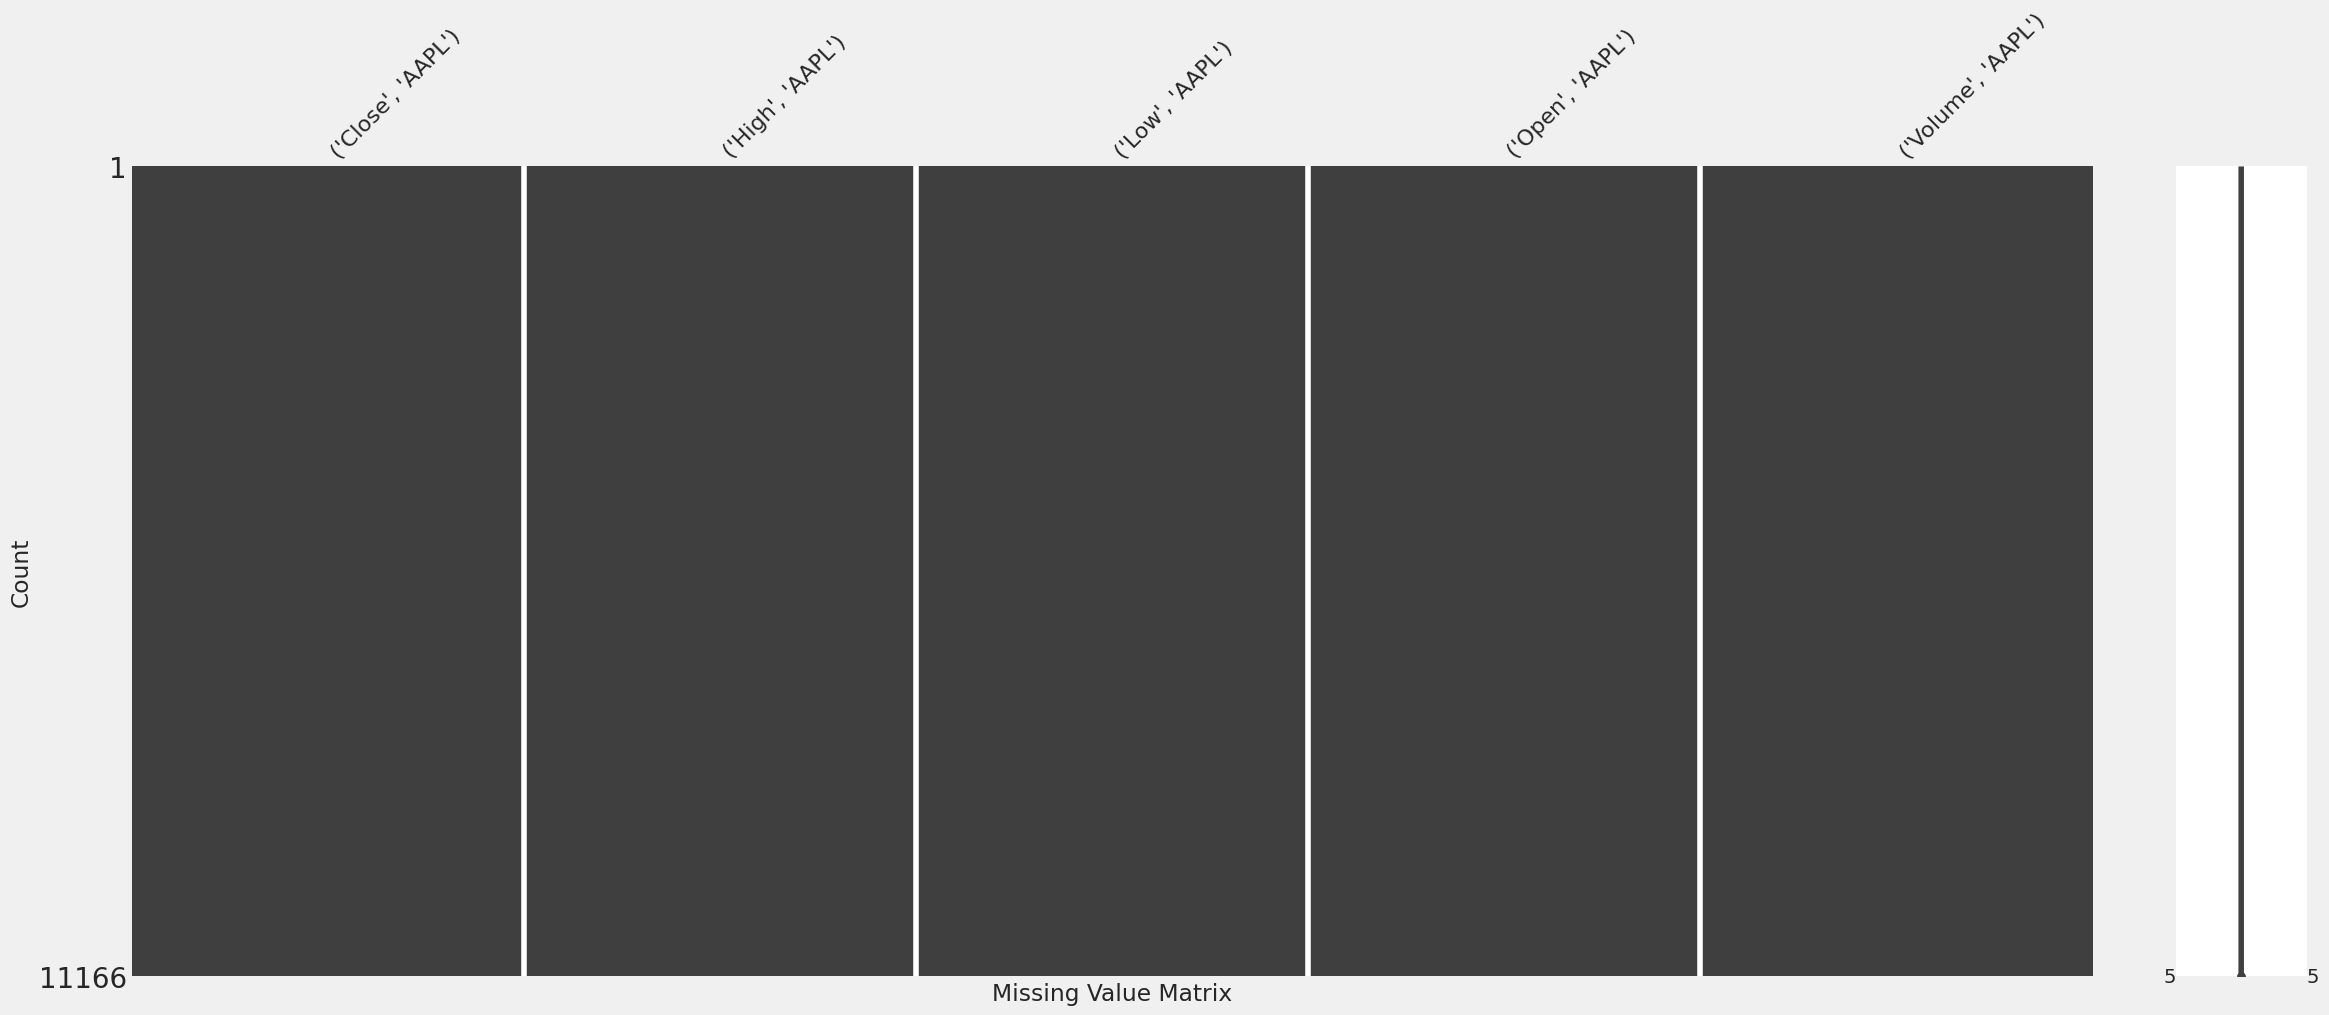

In [ ]:
import missingno as msno
msno.matrix(nvda_df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

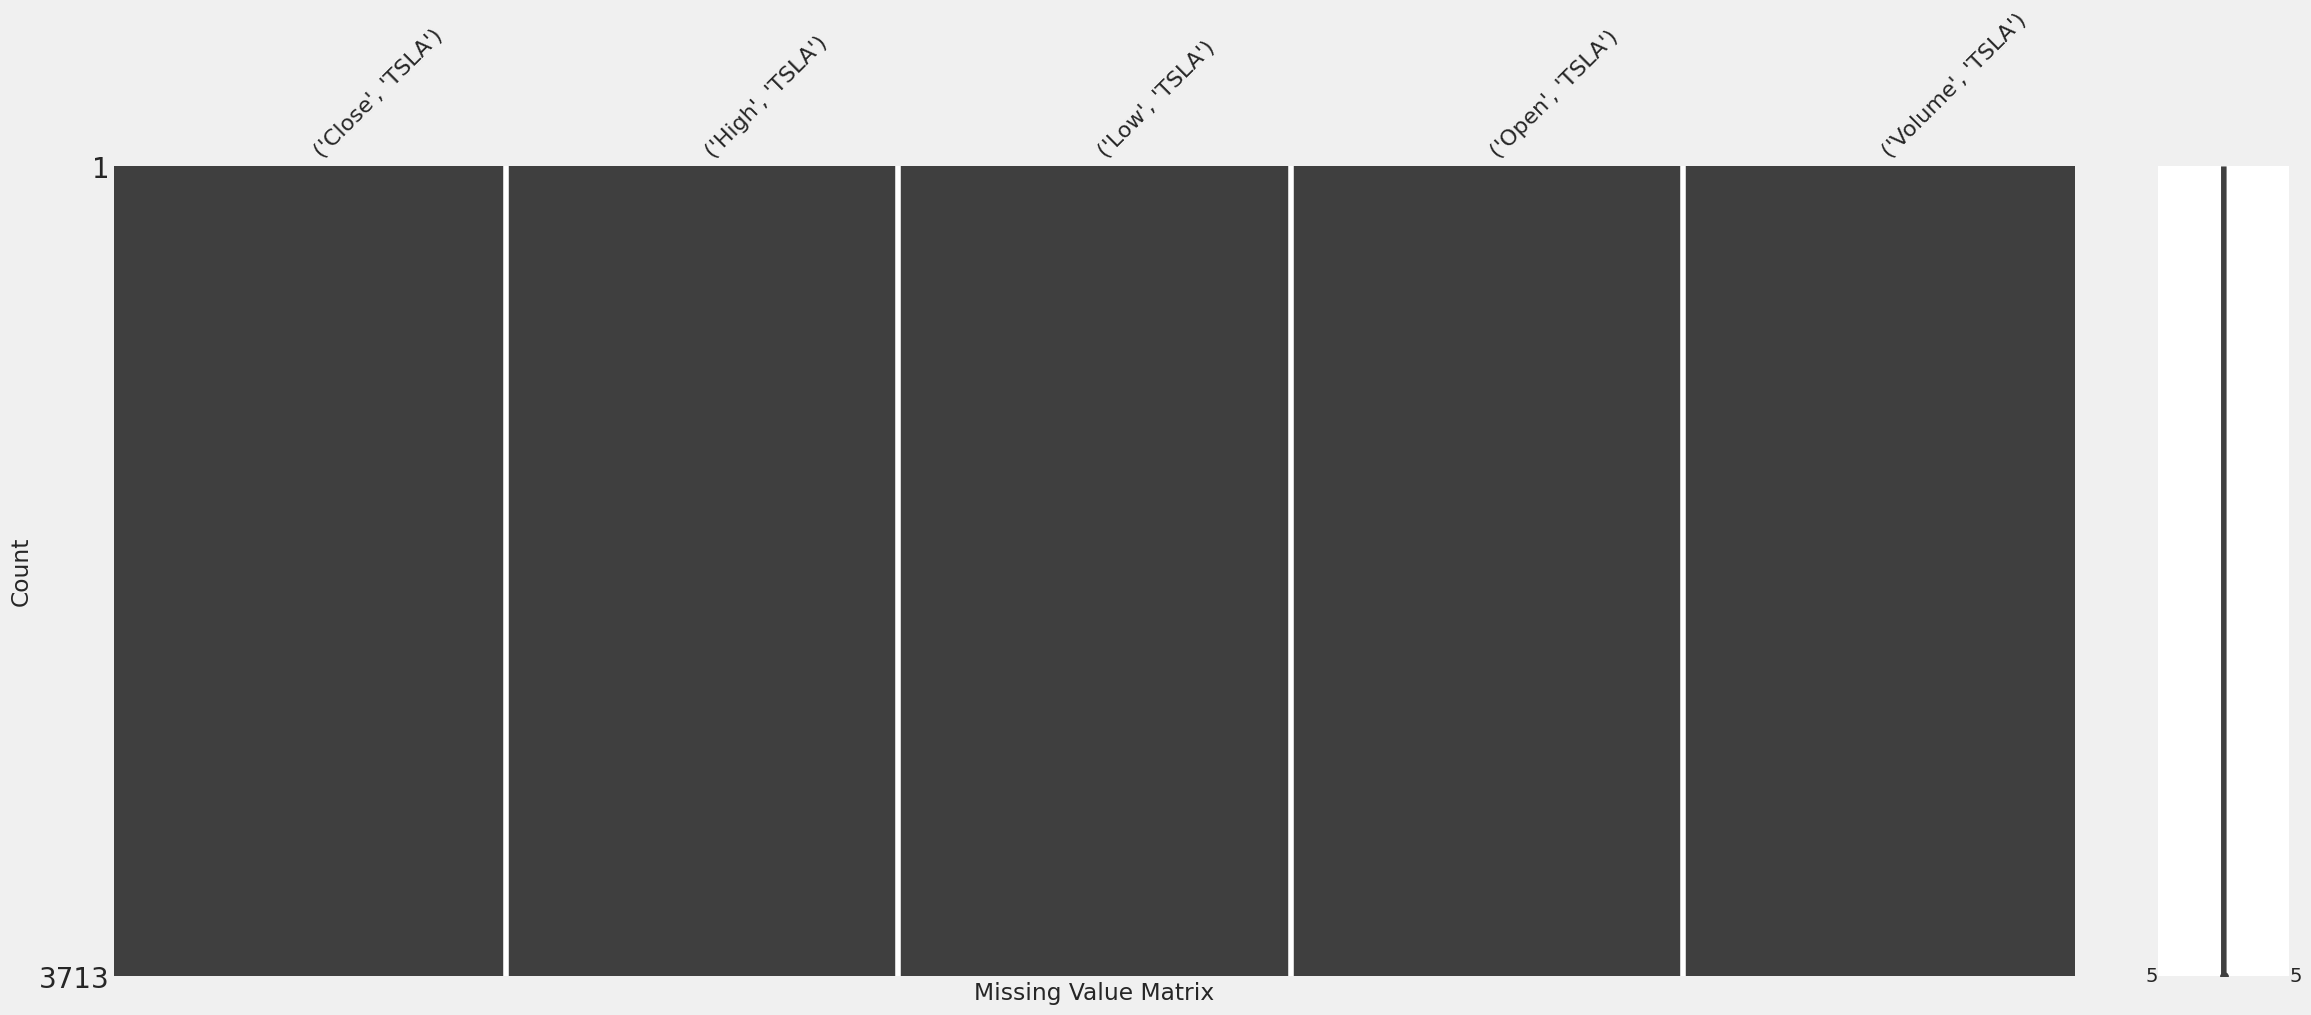

In [ ]:
msno.matrix(tsla_df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

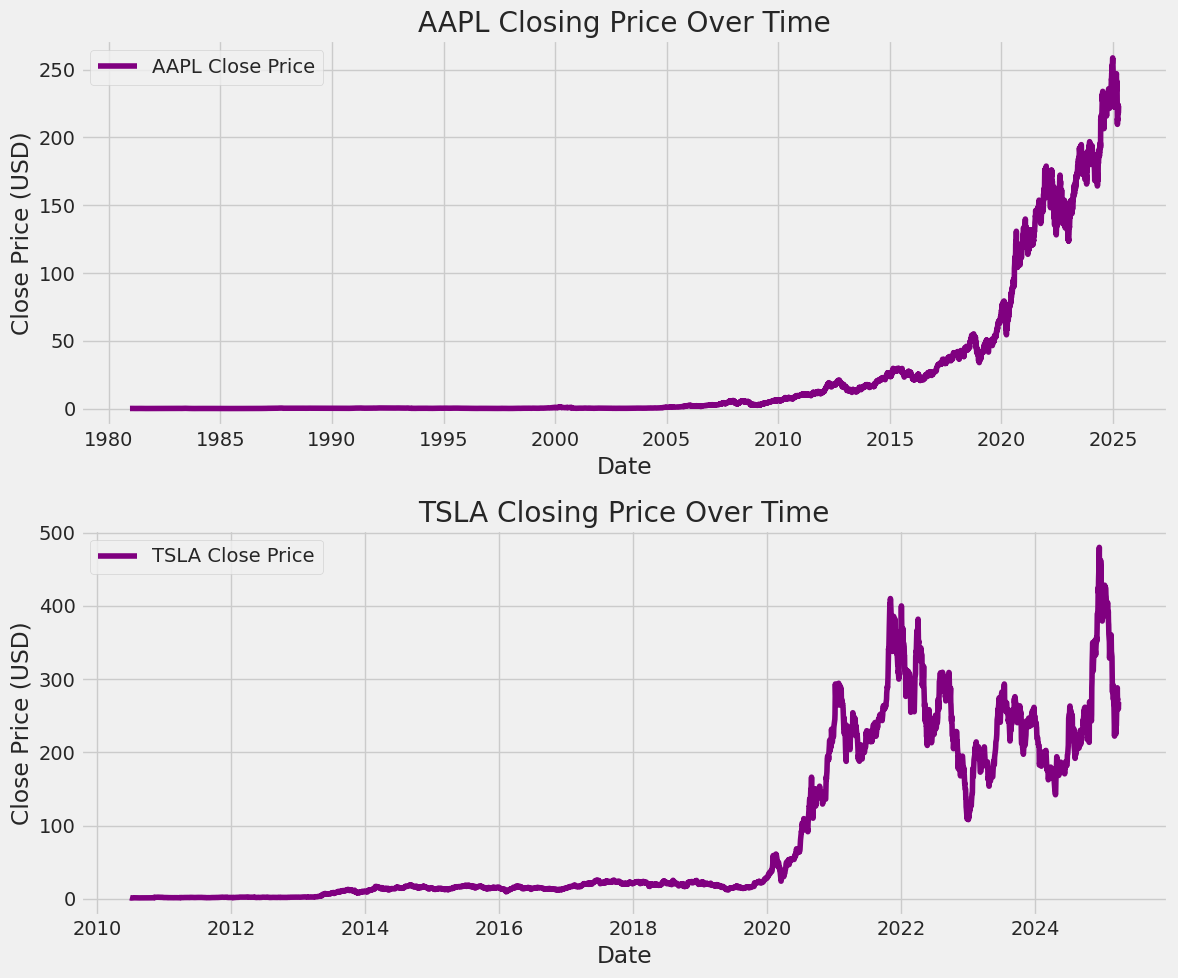

In [ ]:
# Create subplots: one subplot per stock
fig, axes = plt.subplots(len(tech_list), 1, figsize=(12, 5 * len(tech_list)))

# If there is only one stock, ensure axes is treated as a list
if len(tech_list) == 1:
    axes = [axes]

# Plot each stock in a separate subplot
for i, (stock, df) in enumerate(company_dict.items()):
    axes[i].plot(df.index, df['Close'], label=f"{stock} Close Price", color='purple')
    axes[i].set_title(f"{stock} Closing Price Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Close Price (USD)")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

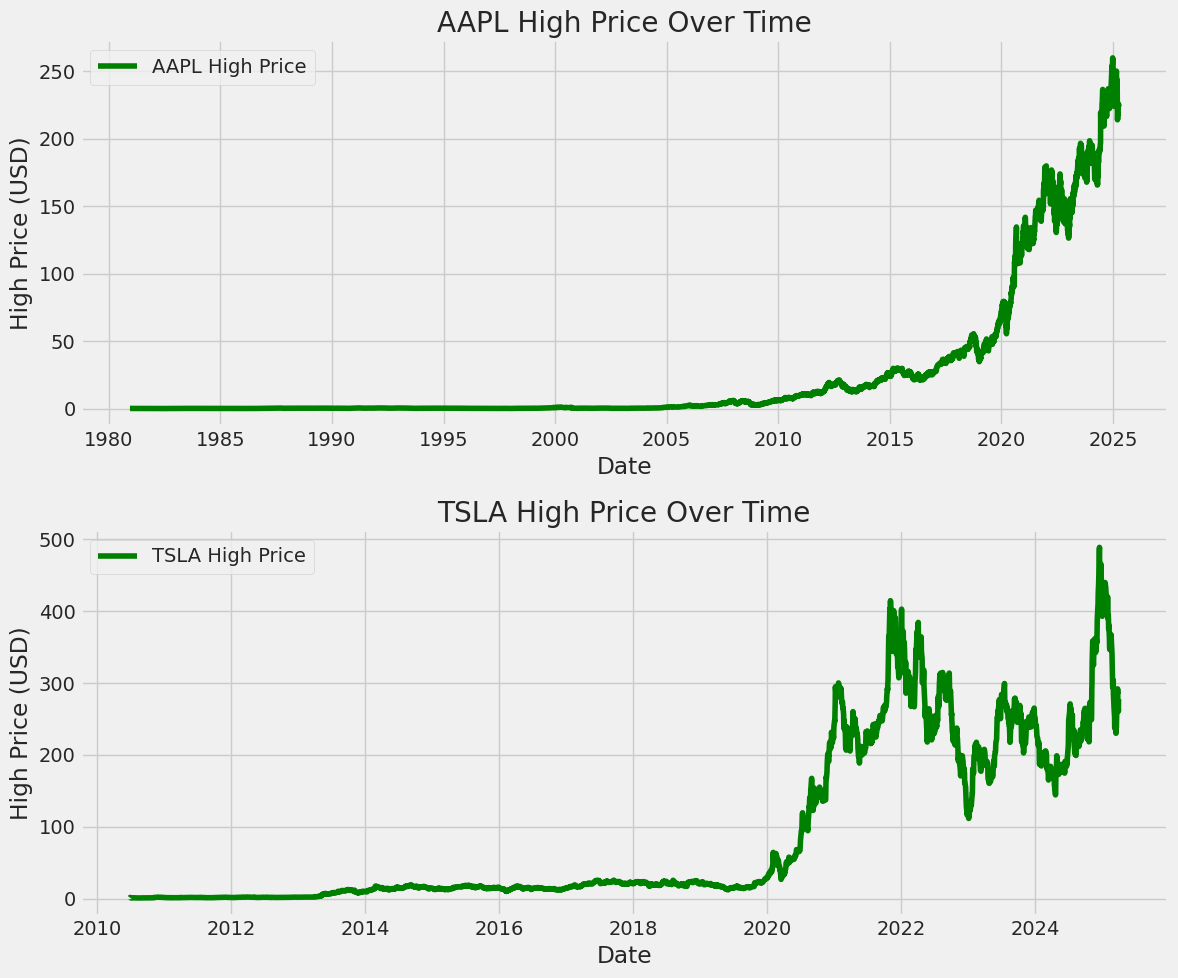

In [ ]:
# Create subplots: one subplot per stock
fig, axes = plt.subplots(len(tech_list), 1, figsize=(12, 5 * len(tech_list)))

# If there is only one stock, ensure axes is treated as a list
if len(tech_list) == 1:
    axes = [axes]

# Plot each stock in a separate subplot
for i, (stock, df) in enumerate(company_dict.items()):
    axes[i].plot(df.index, df['High'], label=f"{stock} High Price", color='g')
    axes[i].set_title(f"{stock} High Price Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("High Price (USD)")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

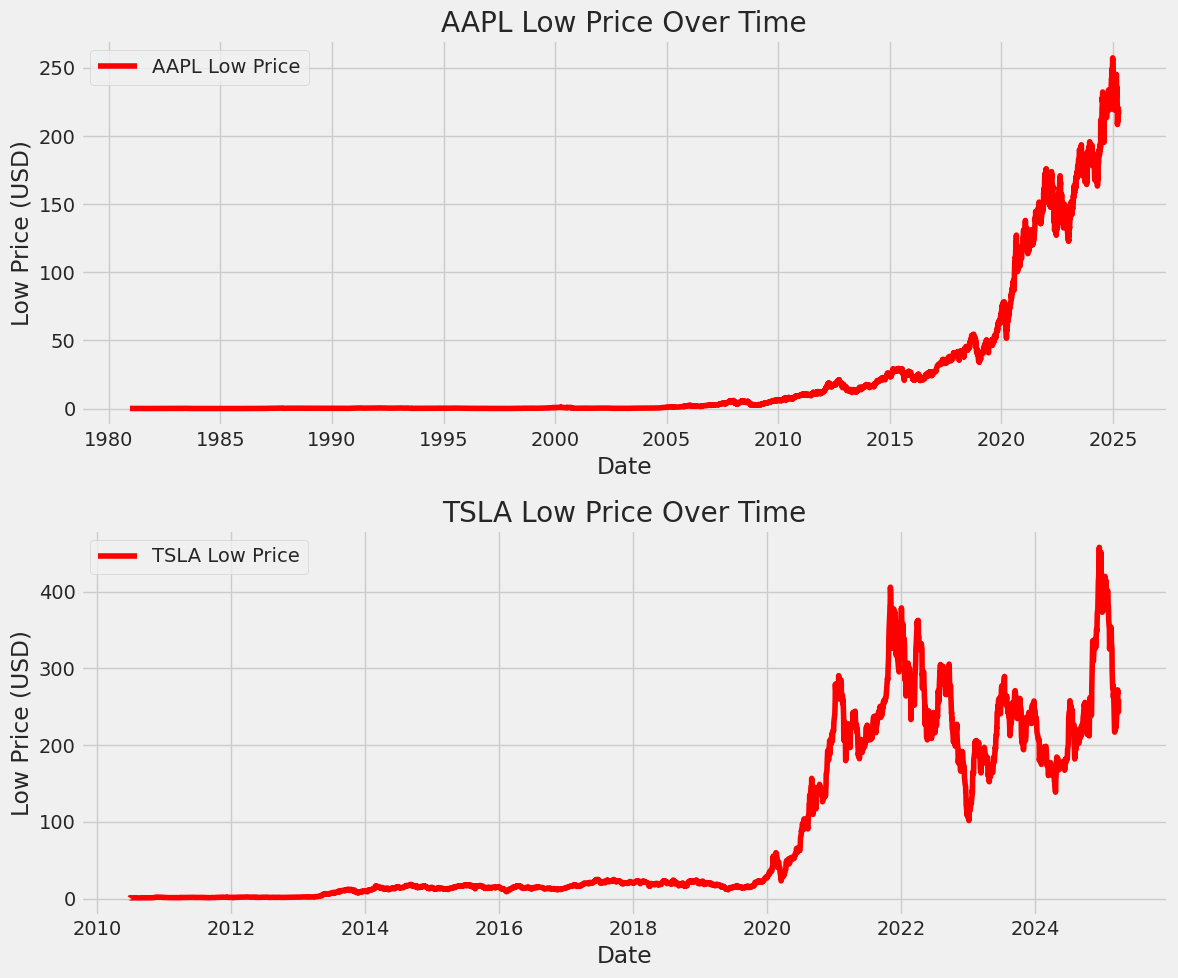

In [ ]:
# Create subplots: one subplot per stock
fig, axes = plt.subplots(len(tech_list), 1, figsize=(12, 5 * len(tech_list)))

# If there is only one stock, ensure axes is treated as a list
if len(tech_list) == 1:
    axes = [axes]

# Plot each stock in a separate subplot
for i, (stock, df) in enumerate(company_dict.items()):
    axes[i].plot(df.index, df['Low'], label=f"{stock} Low Price", color='r')
    axes[i].set_title(f"{stock} Low Price Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Low Price (USD)")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

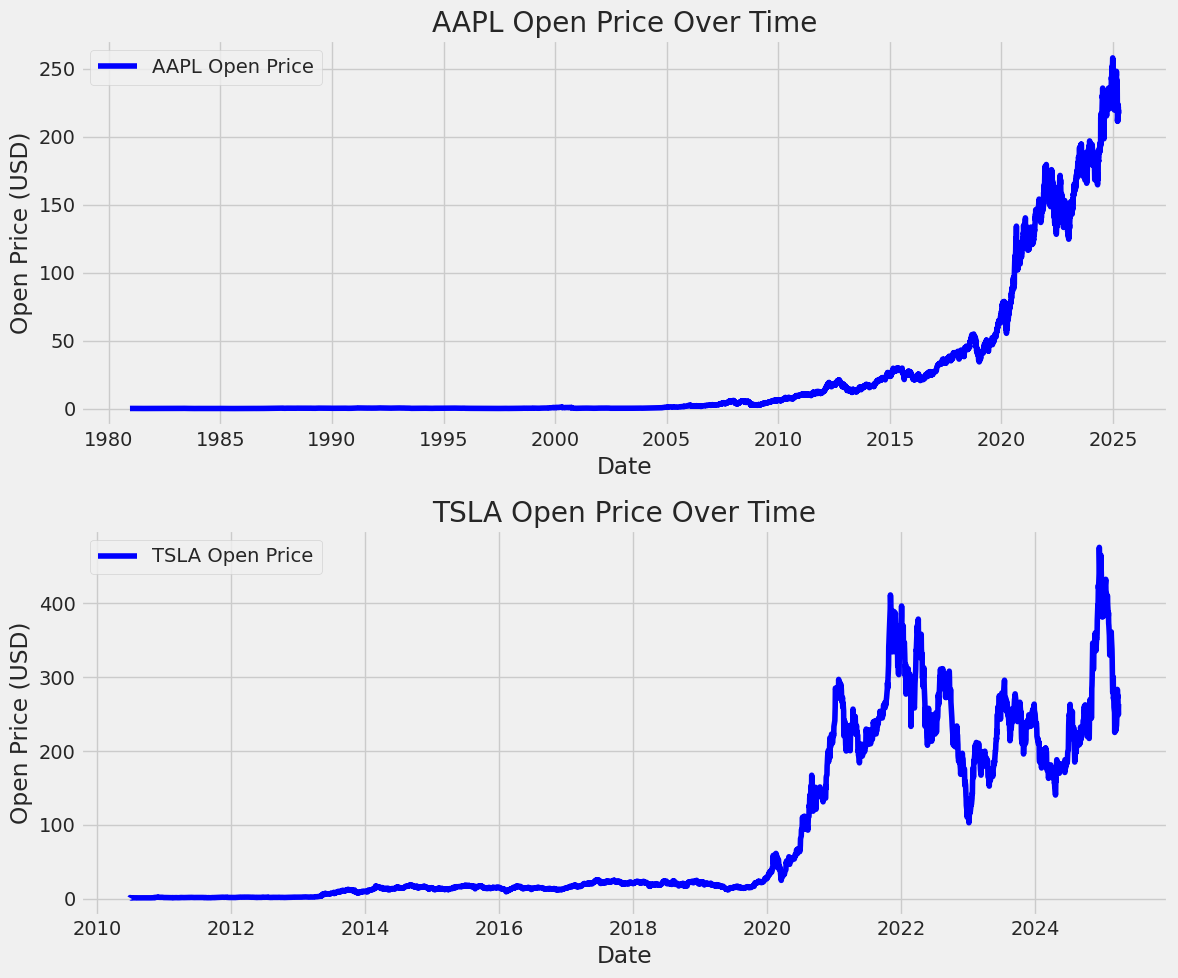

In [ ]:
# Create subplots: one subplot per stock
fig, axes = plt.subplots(len(tech_list), 1, figsize=(12, 5 * len(tech_list)))

# If there is only one stock, ensure axes is treated as a list
if len(tech_list) == 1:
    axes = [axes]

# Plot each stock in a separate subplot
for i, (stock, df) in enumerate(company_dict.items()):
    axes[i].plot(df.index, df['Open'], label=f"{stock} Open Price", color='blue')
    axes[i].set_title(f"{stock} Open Price Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Open Price (USD)")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


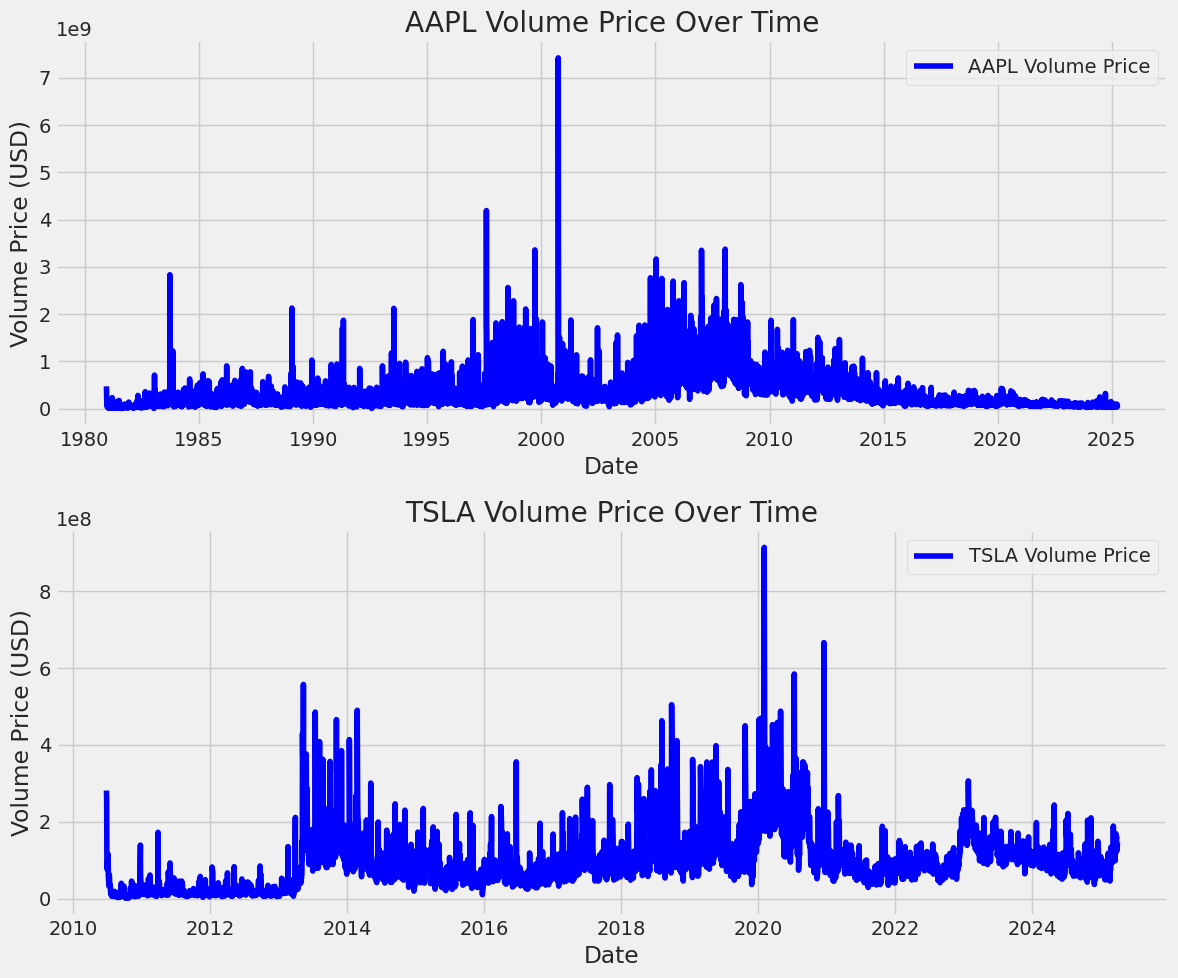

In [ ]:
# Create subplots: one subplot per stock
fig, axes = plt.subplots(len(tech_list), 1, figsize=(12, 5 * len(tech_list)))

# If there is only one stock, ensure axes is treated as a list
if len(tech_list) == 1:
    axes = [axes]

# Plot each stock in a separate subplot
for i, (stock, df) in enumerate(company_dict.items()):
    axes[i].plot(df.index, df['Volume'], label=f"{stock} Volume Price", color='blue')
    axes[i].set_title(f"{stock} Volume Price Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Volume Price (USD)")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()
